# Pilula - Como encontrar Outliers com python

# Material de consulta 
- [como fazer fórmulas em markdown](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)
- [símbolos matemáticos](https://rpruim.github.io/s341/S19/from-class/MathinRmd.html)
- [básico markdown](https://docs.pipz.com/central-de-ajuda/learning-center/guia-basico-de-markdown#open)

Vídeo utilizado
- [sobre outliers](https://www.youtube.com/watch?v=xhHWlAUef2k)


In [31]:
# Bibliotecas Gerais
from scipy.stats import norm
import matplotlib.pyplot as plt

# Identificando Outlier com Z-Score
- O z-score nos dá uma ideia do quanto um determinado ponto está afastado da média dos dados.
    - Mede quantos desvios padrão abaixo ou acima da média populacional ou amostral dos dados estão
    
Onde :
- x : observação
- $u$ : média
- $\rho$ : desvio padrão

   $Z=\frac{x - u}{$\rho}$
   



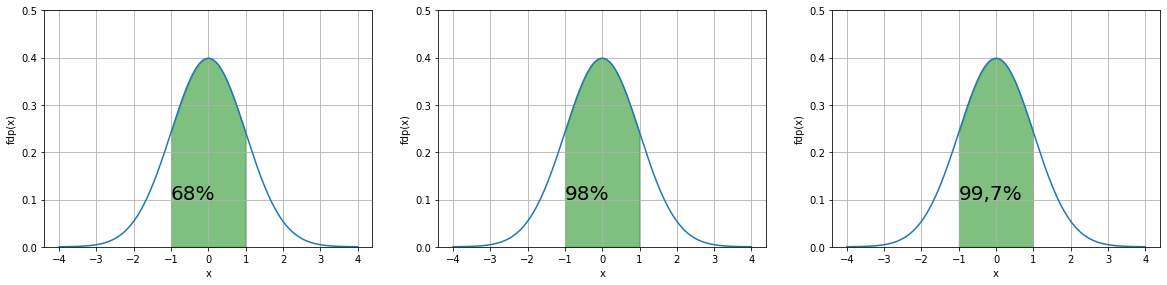

In [32]:
i=1
plt.figure(figsize=(20,20))

for c in ['68%', '98%', '99,7%']:
    plt.subplot(4,3,i)
    x=np.arange(-4,4,0.001)
    plt.plot(x,norm.pdf(x))
    plt.xlabel('x')
    plt.ylabel('fdp(x)')
    plt.grid(True)
    #preencher
    px=np.arange(-1,1,0.01)
    plt.ylim(0,0.5)
    plt.fill_between(px,norm.pdf(px),alpha=0.5,color='g')
    plt.text(-1,0.1,c,fontsize=20)
    i+=1
plt.show()    

In [33]:
# função para encontrar outliers usando z-score
outliers=[]
def find_outliers(data_set):
    corte_dp=3
    media=np.mean(data_set)
    dp=np.std(data_set)
    
    for dado in data_set:
        z_score=(dado-media)/dp
        if np.abs(z_score)>=corte_dp:
            outliers.append(dado)
    return outliers

In [34]:
#criando dados de análise
import random
dataset=random.sample(range(0,40),30)
dataset.insert(8,1500)
dataset.insert(3,1550)
print(dataset)

[38, 17, 37, 1550, 15, 7, 22, 39, 16, 1500, 12, 11, 8, 10, 18, 3, 14, 23, 32, 36, 30, 2, 1, 9, 4, 26, 0, 29, 24, 21, 5, 28]


In [35]:
# extraindo outlyers usando a função
outliers=find_outliers(dataset)
outliers

[1550, 1500]

# Amplitude Interquartil

- Diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1)

Como determinar Outlier com AI :

1. Ordenar os dados de forma crescente
2. Calcular primeiro e terceiro quartil
3. Determinar a Amplitude Interquartil
4. Encontrar o limite inferior (Q1 * 1,5)
5. Encontrar o limite superior (Q3 * 1,5)

In [36]:
data=random.sample(range(1,11),10)
data

[6, 8, 5, 1, 10, 2, 9, 7, 3, 4]

In [37]:
dataset=random.sample(range(0,40),30)
dataset.insert(8,1500)
dataset.insert(3,1550)
print(dataset)

[23, 20, 4, 1550, 16, 30, 33, 2, 1, 1500, 27, 39, 17, 26, 18, 37, 5, 10, 8, 32, 7, 3, 11, 6, 9, 31, 19, 22, 34, 38, 14, 36]


In [38]:
Q1,Q3 = np.percentile(dataset,[25,75])
print('Primeiro Quartil ou Percetil 25%', Q1)
print('Terceiro Quartil ou Percetil 75%', Q3)

Primeiro Quartil ou Percetil 25% 8.75
Terceiro Quartil ou Percetil 75% 32.25


In [39]:
Amp_interquartil=Q3-Q1
print(Amp_interquartil)

23.5


In [40]:
limite_inferior =Q1 -(1.5 *Amp_interquartil)
limite_superior =Q3 +(1.5 *Amp_interquartil)

print('Limite Inferior: ',limite_inferior)
print('Limite Superior: ',limite_superior)

Limite Inferior:  -26.5
Limite Superior:  67.5
